## 1. Introduction

# STAT207 Final Project - College Basketball Statistics

YOUR NAMES                  
Riku Komatani: ruk2:  Did section 3                       
Evan Ericson: evanae2:  Did section 2          
Jakub Szumny: jszum3: Did section 4
We all worked together on sections 1, 5, and 6, and conclusion


Motivation: NCAA Division 1 Basketball is incredibly popular in America. Millions place bets on games and fill out March Madness brackets, competing against each other both for fun and for cash/prizes. Having a thorough understanding of team/conference statistics can have drastic, positive effects on one's betting and bracket strategization and greatly improve the likelihood of winning cash/prizes or beating out your friends in a fun, inconsequential competition. In either case, exploring datasets, like the one that we've chosen, is what will enable us to understand the game(s) as best we can and make strong, informed, and accurate predictions about them.  

Research Questions:  
1.) How does the Big 10 compare to the Big 12 and the Missouri Valley Conference in team strength? 
2.) Is the average 3-point shooting percentage for all college basketball teams in BIG 10 conference different than the average 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons?
3.) Is there a strong correlation between Offensive Efficiency, Defensive Efficiency, Effective Field Goal, and Offensive Rebound Rate (explanatory variables) and the Total Number of Wins that a team has (response variable)?
        - Which of those four variables has the largest effect on total wins?
4.) Which aspects of a team's playstyle/game have the biggest impact on their Power Rating? 
        - Alternatively . . . Which aspects of a team's playstyle/game are most important in determining whether they are above average in strength relative to other Division 1 teams?

Critical Considerations: The dataset and our analysis looks at teams' statistics by season. This means that roughly 40 individual games and their respective statistics are being combined into singular figures that don't account for factors like strength of schedule or extremely good or bad individual performances. This is something that we need to consider when attempting to draw conclusions about teams' strength, performances, and playstyles from this dataset. Having data on individual games, individual player performances, and teams' strength of schedule would allow for more accurate comparisons and conclusions to be made. The "Power Rating" (estimated probability of beating the "average" Division 1 school) variable is one that we will probably choose to look at a lot throughout the project because it provides a standardized metric that accounts for some of the limiting factors mentioned before (it considers the strength of opponents that teams have wins over, for example). However, if we are going to use it to draw conclusions, we must be considerate of the fact that it is a statistical estimation and not a definite measure of events that have actually happened like the other statistics in the dataset.  

In [2]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [3]:
 cbb_df = pd.read_csv("cbb.csv")
cbb_df
del([cbb_df["POSTSEASON"], cbb_df["SEED"], cbb_df["WAB"],])

FileNotFoundError: [Errno 2] No such file or directory: 'cbb.csv'

In [ ]:
cbb_df = cbb_df.rename(columns={"TEAM": "Team","YEAR": "Year",'CONF': 'Conference', 'G': 'Total_Games_Played', "W": "Total_Games_Won", "ADJOE": "Adjusted_Offensive_Efficiency", "ADJDE": "Adjusted_Defensive_Efficiency", "BARTHAG": "Power_Rating", "EFG_O": "Effictive_Field_Goal_Percentage_Shot", "EFG_D": "Effictive_Field_Goal_Percentage_Allowed", "TOR": "Turnover_Percentage_Allowed", "ORB": "Offensive_Rebound_Rate", "DRB": "Offensive_Rebound_Rate_Allowed", "FTR": "Free_Throw_Rate", "FTRD": "Free_Throw_Rate_Allowed", "2P_O": "Two_Point_Shooting_Percentage", "2P_D": "Two_Point_Shooting_Percentage_Allowed", "3P_O": "Three_Point_Shooting_Percentage", "3P_D": "Three_Point_Shooting_Percentage_Allowed", "ADJ_T": "Adjusted_Tempo"})
cbb_df.head(6)

,Team,Conference,Total_Games_Played,Total_Games_Won,Adjusted_Offensive_Efficiency,Adjusted_Defensive_Efficiency,Power_Rating,Effictive_Field_Goal_Percentage_Shot,Effictive_Field_Goal_Percentage_Allowed,Turnover_Percentage_Allowed,...,Offensive_Rebound_Rate,Offensive_Rebound_Rate_Allowed,Free_Throw_Rate,Free_Throw_Rate_Allowed,Two_Point_Shooting_Percentage,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Year
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,42.0,29.7,51.8,36.8,50.0,44.9,33.2,32.2,65.9,2014


In [ ]:
cbb_df.shape

(2455, 21)

## 2. Descriptive Analytics

Research Question: How does the Big 10 compare to the Big 12 and the Missouri Valley Conference in team strength?

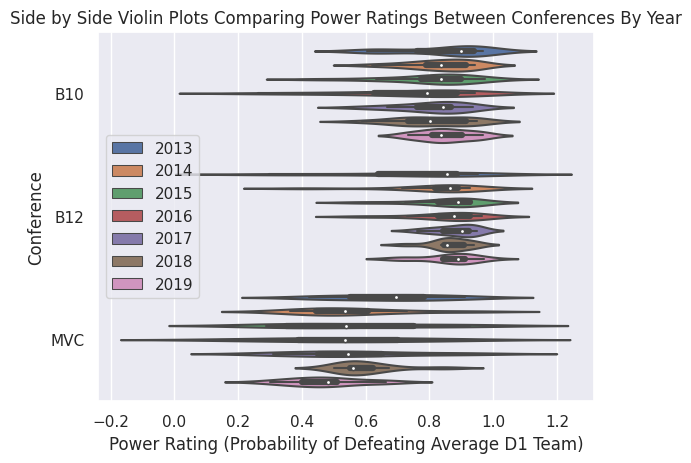

In [ ]:
dfgb = cbb_df[(cbb_df["Conference"] == "B10") | (cbb_df["Conference"] == "MVC") | (cbb_df["Conference"] == "B12")] 
sns.violinplot(data=dfgb, x="Power_Rating", y="Conference", hue="Year") 
plt.xlabel('Power Rating (Probability of Defeating Average D1 Team)')
plt.ylabel('Conference')
plt.title('Side by Side Violin Plots Comparing Power Ratings Between Conferences By Year') 
plt.legend(loc='center left')
plt.show()

In [ ]:
dfb10 = dfgb[dfgb["Conference"] == "B10"] 
print("Big 10 Median Power Rating Across All Years: ", dfb10.Power_Rating.median())
print("Big 10 Mean Power Rating Across All Years: ", dfb10.Power_Rating.mean())
print("Big 10 Standard Deviation of Power Rating Across All Years: ", dfb10.Power_Rating.std()) 
print("Big 10 IQR of Power Rating Across All Years: ", dfb10.Power_Rating.quantile(0.75) - dfb10.Power_Rating.quantile(0.25)) 
print("Big 10 Minimum Power Rating Across All Years: ", dfb10.Power_Rating.min()) 
print("Big 10 Maximum Power Rating Across All Years: ", dfb10.Power_Rating.max())

Big 10 Median Power Rating Across All Years:  0.83965
Big 10 Mean Power Rating Across All Years:  0.8103872340425533
Big 10 Standard Deviation of Power Rating Across All Years:  0.13372858987238467
Big 10 IQR of Power Rating Across All Years:  0.1699750000000001
Big 10 Minimum Power Rating Across All Years:  0.261
Big 10 Maximum Power Rating Across All Years:  0.9758


In [ ]:
dfb12 = dfgb[dfgb["Conference"] == "B12"] 
print("Big 12 Median Power Rating Across All Years: ", dfb12.Power_Rating.median())
print("Big 12 Mean Power Rating Across All Years: ", dfb12.Power_Rating.mean())
print("Big 12 Standard Deviation of Power Rating Across All Years: ", dfb12.Power_Rating.std()) 
print("Big 12 IQR of Power Rating Across All Years: ", dfb12.Power_Rating.quantile(0.75) - dfb12.Power_Rating.quantile(0.25)) 
print("Big 12 Minimum Power Rating Across All Years: ", dfb12.Power_Rating.min()) 
print("Big 12 Maximum Power Rating Across All Years: ", dfb12.Power_Rating.max())

Big 12 Median Power Rating Across All Years:  0.87565
Big 12 Mean Power Rating Across All Years:  0.8349342857142859
Big 12 Standard Deviation of Power Rating Across All Years:  0.1331078378181121
Big 12 IQR of Power Rating Across All Years:  0.09019999999999995
Big 12 Minimum Power Rating Across All Years:  0.2964
Big 12 Maximum Power Rating Across All Years:  0.9696


In [ ]:
dfmvc = dfgb[dfgb["Conference"] == "MVC"] 
print("Missouri Valley Conference Median Power Rating Across All Years: ", dfmvc.Power_Rating.median())
print("Missouri Valley Conference Mean Power Rating Across All Years: ", dfmvc.Power_Rating.mean())
print("Missouri Valley Conference Standard Deviation of Power Rating Across All Years: ", dfmvc.Power_Rating.std()) 
print("Missouri Valley Conference IQR of Power Rating Across All Years: ", dfmvc.Power_Rating.quantile(0.75) - dfmvc.Power_Rating.quantile(0.25)) 
print("Missouri Valley Conference Minimum Power Rating Across All Years: ", dfmvc.Power_Rating.min()) 
print("Missouri Valley Conference Maximum Power Rating Across All Years: ", dfmvc.Power_Rating.max())

Missouri Valley Conference Median Power Rating Across All Years:  0.54745
Missouri Valley Conference Mean Power Rating Across All Years:  0.5712057142857143
Missouri Valley Conference Standard Deviation of Power Rating Across All Years:  0.18652411421654042
Missouri Valley Conference IQR of Power Rating Across All Years:  0.22625
Missouri Valley Conference Minimum Power Rating Across All Years:  0.1393
Missouri Valley Conference Maximum Power Rating Across All Years:  0.9403


Looking at the violin plots, we see that, generally, teams from the Big 10 have had greater average power ratings than teams from the Missouri Valley Conference and smaller average power ratings than teams from the Big 12; the Big 10 and Big 12 have very close centers at just over the 0.8 mark, while the Missouri Valley trails behind with centers around the 0.5 mark. This indicates that the Big 10 is a slightly weaker conference, on average than the Big 12, and a significantly stronger conference than the MVC. The medians and means (without differentiation by year) of the conferences’ power ratings tell a similar story: the Big 12 has a median power rating from 2013 to 2019 of 0.8757, the Big 10 has a median of 0.8397, and the MVC has a median of 0.5475. The respective means of each conference are 0.8349 (Big 12), 0.8104 (Big 10), and 0.5712 (MVC). For both the Big 12 and Big 10, the mean values are pulled down by low outliers, but, for the MVC, their mean power rating is pulled up by high outliers, which matches with the visible leftward skew seen in the distributions of most of Big 12 and Big 10 violin plots, and the apparent rightward skew of most of the MVC distributions. 

Over time, the centers of the distributions of each conference’s power ratings have stayed roughly the same. The distribution spreads, on the other hand, appear to have gotten tighter for all three conferences from 2013 to 2019, indicating more consistency in strength from team to team in each conference. Generally, it looks as though the MVC has much larger spreads than the Big 10 and Big 12 (which are relatively similar, with the Big 12 appearing to be slightly tighter). The standard deviations and IQRs of the conferences’ respective distributions support this (Big 10 has a standard deviation that is slightly larger than the Big 12’s and significantly larger than the MVC; it also has an IQR that is significantly larger than the Big 12’s and significantly smaller than the MVC’s). These figures would indicate that the Big 10 is slightly less consistent in strength from team to team than the Big 12, but significantly more consistent than the MVC.  

Overall, the data suggest that the Big 10 is a stronger, more consistent conference than the Missouri Valley, on average, and a slightly weaker, less consistent conference than the Big 12, on average. This means that in a given year, the Big 10 has the potential to be as strong or stronger than the Big 12, but is likely to be weaker in most cases. Compared to the MVC, we would expect the Big 10 to be a stronger conference, in most years, but the relatively high variability of both the Big 10 and MVC’s power ratings means that the MVC could be stronger in a given year (overlap of the plots supports this). 

## 3. Inference

In [ ]:
cbb_df2 = cbb_df
cbb_df2["Is BIG 10"] = (cbb_df2["Conference"] == "B10").astype(int)

We will pick Is BIG 10 and 3 Point Shooting Percentage as our two variables of interest, and explore the relationship between these variables in a population. Is BIG 10 variable tells whether the conference of the team is in BIG 10. We assigned a value of 1 if this is True, and 0 if this is False. 3 Point Shooting Percentage variable informs the Percentage of 3-point shots that the team makes out of all 3-point shot attempts. Is there an association between 3-point shooting percentage and whether the team's conference is BIG 10? In order to explore this, we will choose difference of two population means as our inference parameter, and use hypothesis testing to come up with an answer.

Research Question: 

Is the average 3-point shooting percentage for all college basketball teams in BIG 10 conference different than the average 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons? 

Hypothesis test:

$H_0:\;\mu_1 - \mu_2 = 0$; The population mean of yearly 3-point shooting percentage for all college basketball teams in BIG 10 conference is equal to the population mean of yearly 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons.

$H_a:\;\mu_1 \neq \mu_2$; The population mean of yearly 3-point shooting percentage for all college basketball teams in BIG 10 conference is not equal to the population mean of yearly 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons.

Checking conditions for hypothesis test:

1. The sample with teams in BIG 10 conference is not random, since the years are specifically chosen from 2013 ~ 2019. But we will assume it's random to continue with our test.

undefined. Assume n (BIG 10) = 94 < 10% of entire teams in BIG 10 conference each year from all seasons.

3. The sample with teams not in BIG 10 conference is not random, since the years are specifically chosen from 2013 ~ 2019. But we will assume it's random to continue with our test.

undefined. Assume n (not BIG 10) = 2361 < 10% of entire teams not in BIG 10 conference each year from all seasons.

undefined. n (BIG 10) > 30.

undefined. n (not BIG 10) > 30.

undefined. Assume that these two samples are independent.

In [ ]:
n_1 = len(cbb_df2[cbb_df2["Is BIG 10"] == 1])
n_2 = len(cbb_df2[cbb_df2["Is BIG 10"] == 0])
print("n (BIG 10): ", n_1)
print("n (not BIG 10): ", n_2)

n (BIG 10):  94
n (not BIG 10):  2361


In [ ]:
degree_freedom = min(len(cbb_df2[cbb_df2["Is BIG 10"] == 1]) - 1, len(cbb_df2[cbb_df2["Is BIG 10"] == 0]) - 1)

In [ ]:
mu_1 = cbb_df2[cbb_df2["Is BIG 10"] == 1]["Three_Point_Shooting_Percentage"].mean()
mu_2 = cbb_df2[cbb_df2["Is BIG 10"] == 0]["Three_Point_Shooting_Percentage"].mean()
std_1 = cbb_df2[cbb_df2["Is BIG 10"] == 1]["Three_Point_Shooting_Percentage"].std()
std_2 = cbb_df2[cbb_df2["Is BIG 10"] == 0]["Three_Point_Shooting_Percentage"].std()
point_estimate = mu_1 - mu_2
print("Point Estimate:", point_estimate)
standard_error = np.sqrt(std_1**2 / n_1 + std_2**2 / n_2)
print("Standard Error:", standard_error)

Point Estimate: 0.5873714707976276
Standard Error: 0.32408212699222455


In [ ]:
test_stat = (point_estimate - 0) / standard_error
print("Test Statistic:", test_stat)
p_value = 2 * (1 - t.cdf(test_stat, df = degree_freedom))
print("p-value:", p_value)

Test Statistic: 1.81241550174015
p-value: 0.07314878508570599


Because our p-value = 0.073 < alpha = 0.10, we reject the null hypothesis. Thus, there is enough evidence to suggest that the population mean of yearly 3-point shooting percentage for all college basketball teams in BIG 10 conference is different than the population mean of yearly 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons.

## 4. Linear Regression

In [ ]:
cbb_df.head()

,Team,Conference,Total_Games_Played,Total_Games_Won,Adjusted_Offensive_Efficiency,Adjusted_Defensive_Efficiency,Power_Rating,Effictive_Field_Goal_Percentage_Shot,Effictive_Field_Goal_Percentage_Allowed,Turnover_Percentage_Allowed,...,Offensive_Rebound_Rate_Allowed,Free_Throw_Rate,Free_Throw_Rate_Allowed,Two_Point_Shooting_Percentage,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Year,Is BIG 10
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,2016,0
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,2015,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,2018,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,2019,0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,2017,0


Numeric Response Variable: Total Games Won     
4 Explanatory Variables: Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, Effective Field Goal Percentage Shot, Offensive Rebound Rate

Is there a strong correlation between the four explanatory variables and the numeric response variable?
Which explanatory variable has the highest correlation with the numeric response variable?

In [ ]:
results = smf.ols("Total_Games_Won ~ Adjusted_Offensive_Efficiency + Adjusted_Defensive_Efficiency + Effictive_Field_Goal_Percentage_Shot + Offensive_Rebound_Rate", data = cbb_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Games_Won   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2003.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        03:12:12   Log-Likelihood:                -6337.7
No. Observations:                2455   AIC:                         1.269e+04
Df Residuals:                    2450   BIC:                         1.271e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.1710      2.040     -1.064      0.287      -6.171       1.829
Adjusted_Offensive_Efficiency            0.1533      0.017      9.103      0.000       0.120       0.186
Adjusted_Defensive_Efficiency           -0.4804      0.012    -41.104      0.000      -0.503      -0.457
Effictive_Field_Goal_Percentage_Shot     0.8851      0.036     24.534      0.000       0.814       0.956
Offensive_Rebound_Rate                   0.2730      0.019     14.422      0.000       0.236       0.310
==============================================================================
Omnibus:                        5.731   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.322
Skew:                           0.072   Prob(JB):                       0.0699
Kurtosis:                       2.823   Cond. No.                     4.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

yhat(Total_Games_Won) = -2.1710 + 0.1533×Adjusted_Offensive_Efficiency - 0.4804×Adjusted_Defensive_Efficiency + 0.8851×Effective_Field_Goal_Percentage_shot + 0.2730×Offensive_Rebound_Rate

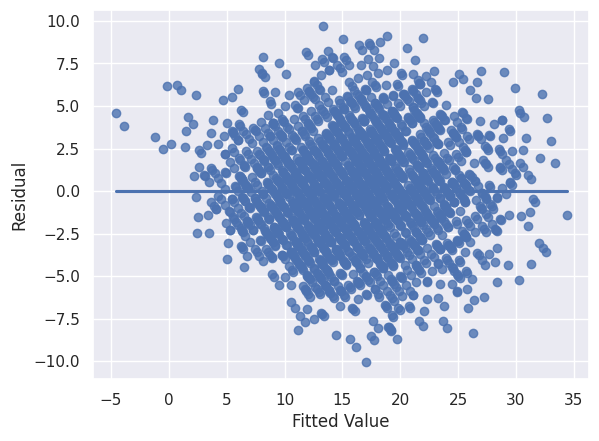

In [ ]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()


# Condition 1 - Linearity Condition
The distribution of points of points in the plot above are roughly evenly distributed above and below the line as we move left to right, so the Linearity Condition is met.

# Condition 2 - Constant Variability of Residuals Condition
The y-axis spread of points in the plot above seem to stay the same as we move from left to right, so we can say that the Constant Variability of Residuals Condition is met.


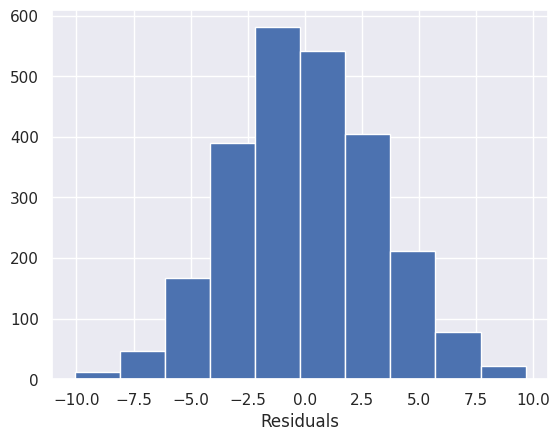

In [ ]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

# Condition 3 - Normality of Residuals (with a mean of 0) Condition
In the histogram above, the mean is 0, the histogram of residuals is normal, unimodal and symmetric, and are not skewed at all, so the normality of residuals condition is met.


# Condition 4 - Independence of Residuals Condition
We cannot verify that the data is randomly sampled, as this contains every college basketball team for every year they played from 2013 - 2019. The sample size of 2,455 is < 10% of all college basketball team seasons ever.

The condition of independence of residuals may be violated as it is not randomly sampled.

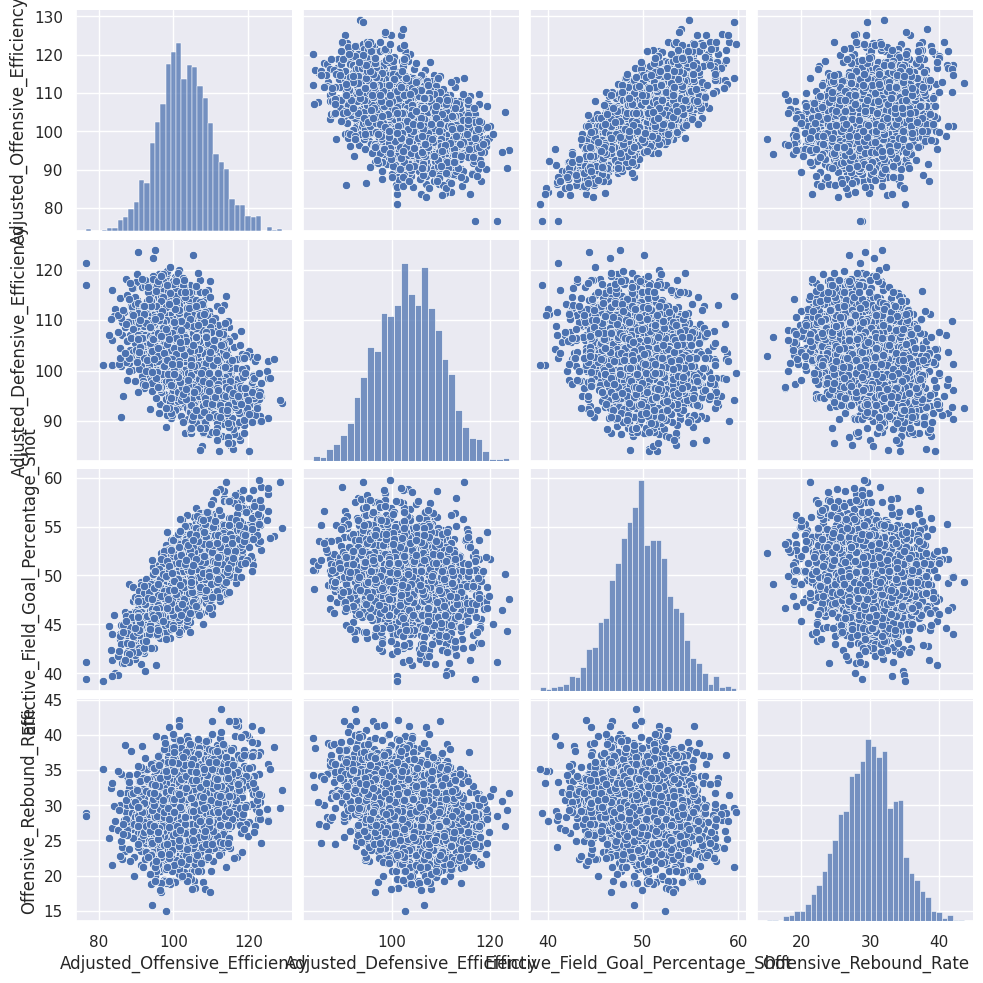

In [ ]:
sns.pairplot(cbb_df[['Adjusted_Offensive_Efficiency', "Adjusted_Defensive_Efficiency", "Effictive_Field_Goal_Percentage_Shot", "Offensive_Rebound_Rate"]])
plt.show()


In [ ]:
cbb_df[['Adjusted_Offensive_Efficiency', "Adjusted_Defensive_Efficiency", "Effictive_Field_Goal_Percentage_Shot", "Offensive_Rebound_Rate"]].corr()

,Adjusted_Offensive_Efficiency,Adjusted_Defensive_Efficiency,Effictive_Field_Goal_Percentage_Shot,Offensive_Rebound_Rate
Adjusted_Offensive_Efficiency,1.000000,-0.483926,0.732286,0.238660
Adjusted_Defensive_Efficiency,-0.483926,1.000000,-0.188506,-0.300670
Effictive_Field_Goal_Percentage_Shot,0.732286,-0.188506,1.000000,-0.169523
Offensive_Rebound_Rate,0.238660,-0.300670,-0.169523,1.000000


There is a high correlation between Adjusted_Offensive_Efficiency and Effictive_Field_Goal_Percentage_Shot, so we will remove one of these variables(one at a time) and see which model's R^2 is higher in order to remove that variable.

In [ ]:
results = smf.ols("Total_Games_Won ~ Adjusted_Defensive_Efficiency + Effictive_Field_Goal_Percentage_Shot + Offensive_Rebound_Rate", data = cbb_df).fit()
print('R^2 for the model without Adjusted_Offensive_Efficiency:',results.rsquared)

R^2 for the model without Adjusted_Offensive_Efficiency: 0.7579374605580782


In [ ]:
results = smf.ols("Total_Games_Won ~ Adjusted_Offensive_Efficiency + Adjusted_Defensive_Efficiency + Offensive_Rebound_Rate", data = cbb_df).fit()
print('R^2 for the model without Effictive_Field_Goal_Percentage_Shot:',results.rsquared)

R^2 for the model without Effictive_Field_Goal_Percentage_Shot: 0.7083353646570075


The R^2 for the model without Adjusted_Offensive_Efficiency is higher, so we will remove it from our model and recheck the conditions

In [ ]:
final_results = smf.ols("Total_Games_Won ~ Adjusted_Defensive_Efficiency + Effictive_Field_Goal_Percentage_Shot + Offensive_Rebound_Rate", data = cbb_df).fit()
final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Games_Won   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     2558.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        03:12:16   Log-Likelihood:                -6378.5
No. Observations:                2455   AIC:                         1.277e+04
Df Residuals:                    2451   BIC:                         1.279e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.8466      1.996      1.426      0.154      -1.068       6.761
Adjusted_Defensive_Efficiency           -0.5250      0.011    -48.681      0.000      -0.546      -0.504
Effictive_Field_Goal_Percentage_Shot     1.1484      0.022     52.356      0.000       1.105       1.191
Offensive_Rebound_Rate                   0.3508      0.017     20.430      0.000       0.317       0.384
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.324
Skew:                           0.053   Prob(JB):                        0.313
Kurtosis:                       2.893   Cond. No.                     3.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

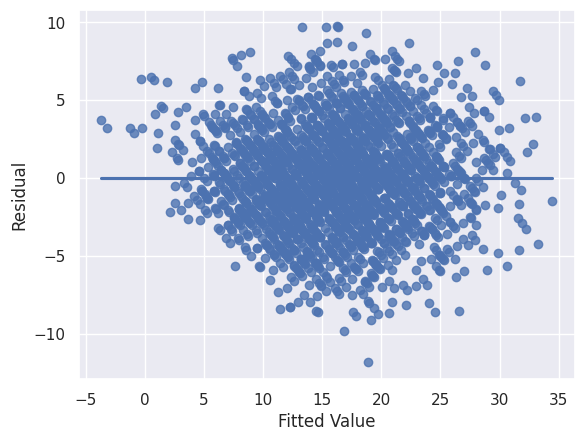

In [ ]:
sns.regplot(x=final_results.fittedvalues, y=final_results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

# Condition 1 - Linearity Condition
The distribution of points of points in the plot above are roughly evenly distributed above and below the line as we move left to right, so the Linearity Condition is met.

# Condition 2 - Constant Variability of Residuals Condition
The y-axis spread of points in the plot above seem to stay the same as we move from left to right, so we can say that the Constant Variability of Residuals Condition is met.

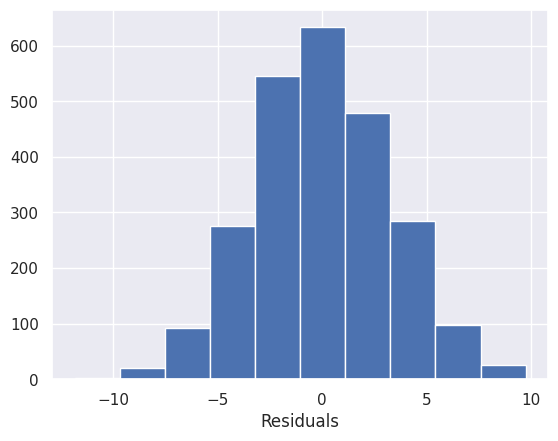

In [ ]:
plt.hist(final_results.resid)
plt.xlabel('Residuals')
plt.show()

# Condition 3 - Normality of Residuals (with a mean of 0) Condition
In the histogram above, the mean is 0, the histogram of residuals is normal, unimodal and symmetric, and are not skewed at all, so the normality of residuals condition is met.

# Condition 4 - Independence of Residuals Condition
We cannot verify that the data is randomly sampled, as this contains every college basketball team for every year they played from 2013 - 2019. The sample size of 2,455 is < 10% of all college basketball team seasons ever.

The condition of independence of residuals may be violated as it is not randomly sampled.

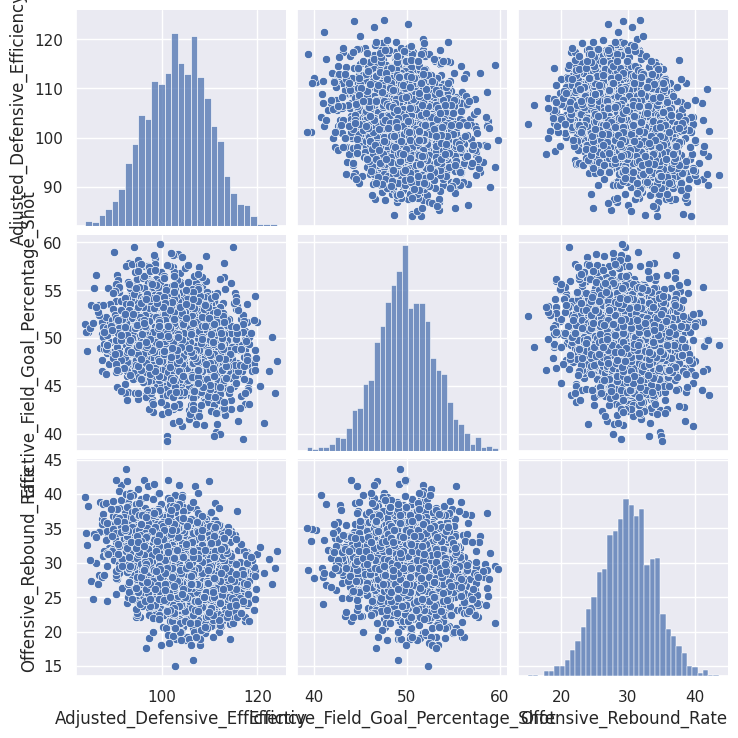

In [ ]:
sns.pairplot(cbb_df[["Adjusted_Defensive_Efficiency", "Effictive_Field_Goal_Percentage_Shot", "Offensive_Rebound_Rate"]])
plt.show()

In [ ]:
cbb_df[["Adjusted_Defensive_Efficiency", "Effictive_Field_Goal_Percentage_Shot", "Offensive_Rebound_Rate"]].corr()

,Adjusted_Defensive_Efficiency,Effictive_Field_Goal_Percentage_Shot,Offensive_Rebound_Rate
Adjusted_Defensive_Efficiency,1.000000,-0.188506,-0.300670
Effictive_Field_Goal_Percentage_Shot,-0.188506,1.000000,-0.169523
Offensive_Rebound_Rate,-0.300670,-0.169523,1.000000


None of the remaining variables are colinear with any other variable, now that Adjusted_Offensive_Efficiency is removed, so now the Multicollinearity condition is met.

0.758, or 75.8% of the variability in our response variable, is explained by this model in the dataset. This is rather high, and it a pretty good model.

We will now make a prediction using this model, for the amount of games won, with an Adjusted_Defensive_Efficiency of 87.2, an Effective_Field_Goal_Percentage_Shot of 51.9, and an Offensive_Rebound_Rate of 35.0

In [ ]:
final_results.predict(exog=dict(Adjusted_Defensive_Efficiency=87.2, Effictive_Field_Goal_Percentage_Shot=51.9, Offensive_Rebound_Rate=35.0))

0    28.94267
dtype: float64

From this prediction, we can see with the stats that we inputted, the team would get about 29 wins in their season.

We have sufficient evidence that every one of our slopes are non-zero in the population model, as they all have an absolute value slope larger than 0.

Our research questions were:
Is there a strong correlation between the four explanatory variables (Offensive Efficiency, Defensive Efficiency, Effective Field Goal, and Offensive Rebound Rate) and the numeric response variable (Total Wins)?
Which explanatory variable has the highest correlation with the numeric response variable?

To answer these questions, with an R Squared of 0.758, we can see that there is in fact a strong correlation between the four explanatory variables and the numeric response variable, even after we had to remove one of the four explanatory variables because of multicollinearity.

The explanatory variable witht the highest correlation with the numeric response variable is Effictive_Field_Goal_Percentage_Shot, as it has the largest slope in the model.

## 5. Logistic Regression

Research Question(s): 

Which aspects of a team's playstyle/game have the biggest impact on their Power Rating? 

Alternatively . . . 

Which aspects of a team's playstyle/game are most important in determining whether they are above average in strength relative to other Division 1 teams?

In [ ]:
cbb_df["Is_Above_Mean_Power_Rating"] = (cbb_df["Power_Rating"] > cbb_df["Power_Rating"].mean()).astype(int)
cbb_df.head()

cbb_train, cbb_test = train_test_split(cbb_df,
test_size=0.25,
random_state=428)

In [ ]:
log_model = smf.logit('Is_Above_Mean_Power_Rating ~ Turnover_Percentage_Allowed + Offensive_Rebound_Rate + Three_Point_Shooting_Percentage + Three_Point_Shooting_Percentage_Allowed', data=cbb_train).fit()
print('ITERATION 1: BIC of the Current Model',log_model.bic)

Optimization terminated successfully.
         Current function value: 0.446289
         Iterations 7
ITERATION 1: BIC of the Current Model 1680.8246613222977


In [ ]:
test_mod1=smf.logit('Is_Above_Mean_Power_Rating ~ Offensive_Rebound_Rate + Three_Point_Shooting_Percentage + Three_Point_Shooting_Percentage_Allowed', data=cbb_train).fit()
print('BIC of Test Model that Deletes Turnover_Percentage_Allowed from the Current Model',test_mod1.bic)

Optimization terminated successfully.
         Current function value: 0.521442
         Iterations 6
BIC of Test Model that Deletes Turnover_Percentage_Allowed from the Current Model 1950.0211066845027


In [ ]:
test_mod2=smf.logit('Is_Above_Mean_Power_Rating ~ Turnover_Percentage_Allowed + Three_Point_Shooting_Percentage + Three_Point_Shooting_Percentage_Allowed', data=cbb_train).fit()
print('BIC of Test Model that Deletes Offensive_Rebound_Rate from the Current Model',test_mod2.bic)

Optimization terminated successfully.
         Current function value: 0.496523
         Iterations 6
BIC of Test Model that Deletes Offensive_Rebound_Rate from the Current Model 1858.271327534763


In [ ]:
test_mod3=smf.logit('Is_Above_Mean_Power_Rating ~ Turnover_Percentage_Allowed + Offensive_Rebound_Rate + Three_Point_Shooting_Percentage_Allowed', data=cbb_df).fit()
print('BIC of Test Model that Deletes Three_Point_Shooting_Percentage from the Current Model',test_mod3.bic)

Optimization terminated successfully.
         Current function value: 0.488134
         Iterations 6
BIC of Test Model that Deletes Three_Point_Shooting_Percentage from the Current Model 2427.9625879950854


In [ ]:
test_mod4=smf.logit('Is_Above_Mean_Power_Rating ~ Turnover_Percentage_Allowed + Offensive_Rebound_Rate + Three_Point_Shooting_Percentage', data=cbb_train).fit()
print('BIC of Test Model that Deletes Three_Point_Shooting_Percentage_Allowed from the Current Model',test_mod4.bic)

Optimization terminated successfully.
         Current function value: 0.523671
         Iterations 6
BIC of Test Model that Deletes Three_Point_Shooting_Percentage_Allowed from the Current Model 1958.230537781294


None of the tests had a lower BIC score than the orignal, so we can proceed.

In [ ]:
log_model = smf.logit('Is_Above_Mean_Power_Rating ~ Turnover_Percentage_Allowed + Offensive_Rebound_Rate + Three_Point_Shooting_Percentage + Three_Point_Shooting_Percentage_Allowed', data=cbb_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.446289
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Is_Above_Mean_Power_Rating   No. Observations:                 1841
Model:                                  Logit   Df Residuals:                     1836
Method:                                   MLE   Df Model:                            4
Date:                        Thu, 04 May 2023   Pseudo R-squ.:                  0.3556
Time:                                03:12:19   Log-Likelihood:                -821.62
converged:                               True   LL-Null:                       -1275.1
Covariance Type:                    nonrobust   LLR p-value:                5.297e-195
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  10.5318      1.632      6.452      0.000       7.333      13.731
Turnover_Percentage_Allowed                -0.5528      0.038    -14.442      0.000      -0.628      -0.478
Offensive_Rebound_Rate                      0.2131      0.017     12.428      0.000       0.180       0.247
Three_Point_Shooting_Percentage             0.2707      0.025     10.625      0.000       0.221       0.321
Three_Point_Shooting_Percentage_Allowed    -0.4612      0.031    -14.803      0.000      -0.522      -0.400
===========================================================================================================
"""

$log (\frac{\hat{p}}{1 - \hat{p}}) = 10.5318 - 0.5528 \times ($Turnover_Percentage_Allowed$) +  0.2131 \times$ (Offensive_Rebound_Rate$) + 0.2707 \times ($Three_Point_Shooting_Percentage$) - 0.4612 \times ($Three_Point_Shooting_Percentage_Allowed)

Where $\hat{p} =$ Is_Above_Mean_Power_Rating

At a significance level of 5%, all of the p-values for the coefficients in our model are sufficiently low to suggest that they are all non-zero values in the population model.

In [ ]:
phat_test = log_model.predict(exog=cbb_test[["Turnover_Percentage_Allowed", "Offensive_Rebound_Rate", "Three_Point_Shooting_Percentage", "Three_Point_Shooting_Percentage_Allowed"]])
cbb_test['phat_test']=phat_test
cbb_test

,Team,Conference,Total_Games_Played,Total_Games_Won,Adjusted_Offensive_Efficiency,Adjusted_Defensive_Efficiency,Power_Rating,Effictive_Field_Goal_Percentage_Shot,Effictive_Field_Goal_Percentage_Allowed,Turnover_Percentage_Allowed,...,Free_Throw_Rate_Allowed,Two_Point_Shooting_Percentage,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Year,Is BIG 10,Is_Above_Mean_Power_Rating,phat_test
826,North Carolina A&T,MEAC,33,20,96.8,111.9,0.1585,51.2,51.5,19.5,...,31.5,54.3,52.5,30.3,33.1,70.1,2018,0,0,0.199592
2390,BYU,WCC,33,23,118.3,100.3,0.8699,53.2,49.6,16.4,...,39.2,50.2,49.6,39.0,33.1,70.8,2015,0,1,0.979629
495,College of Charleston,CAA,30,16,96.4,93.3,0.5922,47.4,48.1,19.5,...,43.1,45.6,48.2,34.0,32.0,65.0,2016,0,1,0.662415
1627,Niagara,MAAC,33,7,100.5,110.2,0.2592,47.2,54.7,18.5,...,50.6,48.0,53.3,30.0,38.4,72.4,2014,0,0,0.079777
1219,Alabama,SEC,33,18,105.4,96.3,0.7387,49.6,46.6,19.9,...,39.1,48.5,45.1,33.9,32.9,65.7,2016,0,1,0.392511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,San Jose St.,MWC,28,6,96.3,102.4,0.3290,46.8,49.6,19.2,...,47.5,48.2,47.9,29.8,35.4,70.6,2016,0,0,0.071203
1354,Grambling St.,SWAC,27,0,76.7,117.0,0.0077,39.4,52.2,26.1,...,38.7,38.4,54.3,28.3,32.1,65.5,2015,0,0,0.007517
645,Penn,Ivy,28,9,96.4,106.4,0.2427,49.1,51.2,23.6,...,39.8,47.7,48.1,34.6,37.6,63.7,2015,0,0,0.014705
202,South Florida,Amer,33,8,97.6,103.8,0.3312,45.4,47.2,21.9,...,35.6,46.2,46.9,28.6,31.9,67.7,2016,0,0,0.236310


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=cbb_test['Is_Above_Mean_Power_Rating'], y_score=cbb_test['phat_test'])
auc = roc_auc_score(y_true=cbb_test['Is_Above_Mean_Power_Rating'], y_score=cbb_test['phat_test'])

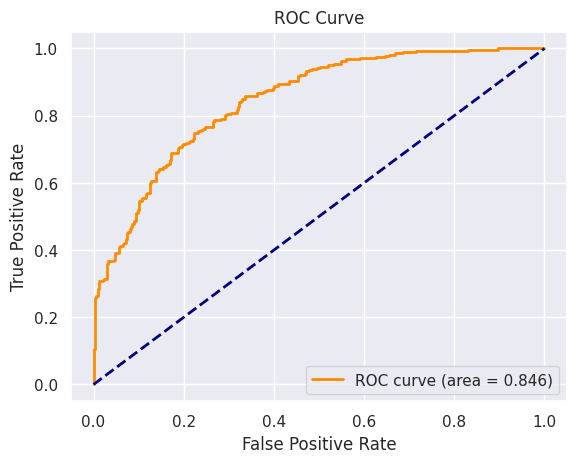

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2,
label='ROC curve (area = '+str(round(auc,3))+')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
    'tpr':[tpr],
    'fpr':[fpr]})

tpr_fpr_thresh(cbb_test["Is_Above_Mean_Power_Rating"], cbb_test['phat_test'], .5)

,threshold,tpr,fpr
0,0.5,0.754513,0.234421


In [ ]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(cbb_test['Is_Above_Mean_Power_Rating'], cbb_test['phat_test'], thresh))


   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.970326
   threshold  tpr       fpr
0       0.02  1.0  0.922849
   threshold  tpr       fpr
0       0.03  1.0  0.905045
   threshold      tpr      fpr
0       0.04  0.99639  0.88724
   threshold      tpr       fpr
0       0.05  0.99639  0.851632
   threshold      tpr       fpr
0       0.06  0.99639  0.833828
   threshold      tpr       fpr
0       0.07  0.99278  0.816024
   threshold      tpr       fpr
0       0.08  0.99278  0.777448
   threshold      tpr       fpr
0       0.09  0.99278  0.771513
   threshold      tpr       fpr
0        0.1  0.99278  0.750742
   threshold      tpr       fpr
0       0.11  0.99278  0.715134
   threshold      tpr       fpr
0       0.12  0.98917  0.712166
   threshold      tpr      fpr
0       0.13  0.98556  0.68546
   threshold       tpr       fpr
0       0.14  0.978339  0.655786
   threshold       tpr      fpr
0       0.15  0.974729  0.64095
   threshold       t

Our predictive probability threshold is .22, because it gives us a high true positive rate of 0.949458 and a relatively low false positive rate of 0.534125. This point is also the closest point to (0,1) on the ROC curve. Our research goal was to determine whether each explanatory variables has an impact on power rating, and we wanted to make sure that teams with high quality explanatory variables are marked with high power rating. Thus, our true positive rate should be as high as possible while keeping the false positive rate low. 

In [ ]:
cbb_test['yhat']=1*(cbb_test['phat_test']>0.22)
cbb_test[["phat_test", "yhat"]]

confusion_matrix(y_true=cbb_test['Is_Above_Mean_Power_Rating'], y_pred=cbb_test['yhat'])
tn, fp, fn, tp = confusion_matrix(y_true=cbb_test['Is_Above_Mean_Power_Rating'],
y_pred=cbb_test['yhat']).ravel()
(tn, fp, fn, tp)

false_positive_rate=fp/(tn+fp)
print('false positive rate:', false_positive_rate)

true_positive_rate = tp/(tp+fn)
print('true positive rate:', true_positive_rate)


false positive rate: 0.5341246290801187
true positive rate: 0.9494584837545126


Our logistic regression analysis proves that each of our four explanatory variables: Turnover_Percentage_Allowed, Offensive_Rebound_Rate, Three_Point_Shooting_Percentage, and Three_Point_Shooting_Percentage_Allowed had a significant impact on each team's power rating. Turnover_Percentage_Allowed and Three_Point_Shooting_Percentage_Allowed had the largest coefficients (-0.5528 and -0.4612, respectively), possibly suggesting that a team's defense, particularly along the perimeter, as well as their ability to control and move the ball with minimal turnovers may be the most important factors in determining whether they will be a "good"/above average Division 1 team if we accept "Power Rating" as an accurate measurement of their strength. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

In this project, we explored Division 1 College Basketball Statistics. By understanding the relationship between different statistics in the game of Basketball, one could better predict the winning team of a match and obtain more prizes. Our first research question was "How does the Big 10 compare to the Big 12 and the Missouri Valley Conference in team strength?" By ploting a side by side viloin plots comparing power ratings between conferences by year, we found out that overall the Big 10 is a stronger, more consistent conference than the Missouri Valley, on average, and a slightly weaker, less consistent conference than the Big 12, on average. 

Next, we explored whether the average 3-point shooting percentage for all college basketball teams in BIG 10 conference different than the average 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons. After applying hypothesis testing, our p-value of 0.073 < alpha = 0.10 indicated that there is enough evidence to suggest that the population mean of yearly 3-point shooting percentage for all college basketball teams in BIG 10 conference is different than the population mean of yearly 3-point shooting percentage for all college basketball teams that are not in BIG 10 conference, from all seasons.

Then, we questioned "Is there a strong correlation between Offensive Efficiency, Defensive Efficiency, Effective Field Goal, and Offensive Rebound Rate (explanatory variables) and the Total Number of Wins that a team has (response variable)? From our linear regression model, we obtained an R Squared of 0.758, which tells us that there is a strong correlation between the four explanatory variables and the numeric response variable, even after we had to remove one of the four explanatory variables because of multicollinearity. We also explored which of those four variables has the largest effect on total wins, and that turned out to be Effective_Field_Goal_Percentage_Shot. 

Finally, we explored on a logistic regression to determine which aspects of a team's playstyle/game have the biggest impact on their Power Rating. We obtained different BIC using several models, and concluded that all four explanotory variables Turnover_Percentage_Allowed, Offensive_Rebound_Rate, Three_Point_Shooting_Percentage, and Three_Point_Shooting_Percentage_Allowed had a significant impact on each team's power rating, thus were needed to build a parsimonious model.

If we were to conduct future work based on these analyses, we might consider all the other meaningful variables besides the four we chose into our logistic regression to determine what other variables affect the team's power rating, and build our complete parsimonious model. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87663a02-45c6-45e8-8268-2215cc05681b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>